In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_excel('hourlydata.xlsx')
dataframe

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2000-01-01 00:00:00,4.0,96,3.4,1.9,0.0,0.0,0.0,0.0,0,...,360,11.5,6.0,11.1,14.3,18.4,0.142,0.183,0.247,0.369
1,2000-01-01 01:00:00,4.1,95,3.4,2.0,0.0,0.0,0.0,0.0,0,...,351,11.9,5.8,10.9,14.3,18.4,0.142,0.183,0.247,0.369
2,2000-01-01 02:00:00,4.0,95,3.2,1.9,0.0,0.0,0.0,0.0,0,...,346,11.9,5.7,10.7,14.3,18.4,0.142,0.183,0.247,0.369
3,2000-01-01 03:00:00,6.5,92,5.4,4.7,0.0,0.0,0.0,0.0,0,...,355,13.0,7.0,10.6,14.3,18.4,0.142,0.183,0.247,0.369
4,2000-01-01 04:00:00,12.9,75,8.7,12.2,0.0,0.0,0.0,0.0,0,...,8,13.0,10.7,10.7,14.3,18.4,0.142,0.183,0.247,0.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211843,2024-03-01 19:00:00,13.9,82,10.8,12.1,1.4,1.4,0.0,0.0,61,...,11,36.0,13.2,14.8,13.8,14.3,0.284,0.258,0.254,0.382
211844,2024-03-01 20:00:00,14.0,81,10.8,12.9,0.1,0.1,0.0,0.0,51,...,40,29.9,13.1,14.7,13.8,14.3,0.284,0.258,0.254,0.382
211845,2024-03-01 21:00:00,14.8,73,10.0,13.7,0.0,0.0,0.0,0.0,2,...,61,22.0,13.1,14.6,13.8,14.3,0.284,0.258,0.254,0.382
211846,2024-03-01 22:00:00,15.4,65,8.8,13.6,0.0,0.0,0.0,0.0,2,...,56,19.8,13.1,14.5,13.8,14.3,0.284,0.258,0.254,0.382


In [3]:
dataframe.isnull().sum()

time                                  0
temperature_2m (°C)                   0
relative_humidity_2m (%)              0
dew_point_2m (°C)                     0
apparent_temperature (°C)             0
precipitation (mm)                    0
rain (mm)                             0
snowfall (cm)                         0
snow_depth (m)                        0
weather_code (wmo code)               0
pressure_msl (hPa)                    0
surface_pressure (hPa)                0
cloud_cover (%)                       0
cloud_cover_low (%)                   0
cloud_cover_mid (%)                   0
cloud_cover_high (%)                  0
et0_fao_evapotranspiration (mm)       0
vapour_pressure_deficit (kPa)         0
wind_speed_10m (km/h)                 0
wind_speed_100m (km/h)                0
wind_direction_10m (°)                0
wind_direction_100m (°)               0
wind_gusts_10m (km/h)                 0
soil_temperature_0_to_7cm (°C)        0
soil_temperature_7_to_28cm (°C)       0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211848 entries, 0 to 211847
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   time                                211848 non-null  datetime64[ns]
 1   temperature_2m (°C)                 211848 non-null  float64       
 2   relative_humidity_2m (%)            211848 non-null  int64         
 3   dew_point_2m (°C)                   211848 non-null  float64       
 4   apparent_temperature (°C)           211848 non-null  float64       
 5   precipitation (mm)                  211848 non-null  float64       
 6   rain (mm)                           211848 non-null  float64       
 7   snowfall (cm)                       211848 non-null  float64       
 8   snow_depth (m)                      211848 non-null  float64       
 9   weather_code (wmo code)             211848 non-null  int64         
 10  pressure

In [5]:
dataframe['Date'] = dataframe['time'].dt.date
wdata = dataframe.groupby('Date').mean()
wdata = wdata.drop(columns=['time'])
wdata['Date'] = dataframe['Date'].unique()
wdata

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),...,wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),Date
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,10.450000,79.208333,6.637500,9.000000,0.0000,0.0000,0.0,0.0,0.000000,1018.208333,...,12.620833,11.191667,11.887500,14.245833,18.400000,0.141292,0.182375,0.246333,0.368417,2000-01-01
2000-01-02,11.100000,80.666667,7.554167,9.833333,0.0000,0.0000,0.0,0.0,0.000000,1017.800000,...,13.245833,11.758333,12.170833,14.200000,18.304167,0.140333,0.182083,0.246000,0.368000,2000-01-02
2000-01-03,11.279167,79.958333,7.608333,10.029167,0.0000,0.0000,0.0,0.0,0.000000,1015.679167,...,13.220833,12.025000,12.504167,14.200000,18.229167,0.139542,0.181583,0.245375,0.368000,2000-01-03
2000-01-04,11.262500,80.083333,7.650000,10.095833,0.0000,0.0000,0.0,0.0,0.000000,1016.341667,...,11.625000,11.879167,12.495833,14.200000,18.154167,0.139292,0.181250,0.245000,0.367042,2000-01-04
2000-01-05,10.591667,82.708333,7.533333,9.312500,0.0000,0.0000,0.0,0.0,0.125000,1016.800000,...,13.470833,11.595833,12.375000,14.200000,18.083333,0.139000,0.181000,0.245000,0.367000,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,14.633333,49.791667,3.470833,12.637500,0.0000,0.0000,0.0,0.0,1.791667,1017.804167,...,10.941667,13.875000,13.179167,13.500000,14.400000,0.247000,0.273250,0.252542,0.384750,2024-02-26
2024-02-27,12.187500,73.041667,7.204167,10.866667,0.0750,0.0750,0.0,0.0,17.791667,1017.941667,...,10.616667,12.658333,13.395833,13.500000,14.400000,0.252875,0.270875,0.253458,0.384000,2024-02-27
2024-02-28,14.504167,60.666667,6.662500,12.991667,0.0000,0.0000,0.0,0.0,0.000000,1014.708333,...,13.416667,13.754167,13.504167,13.525000,14.400000,0.246750,0.265208,0.250083,0.383500,2024-02-28


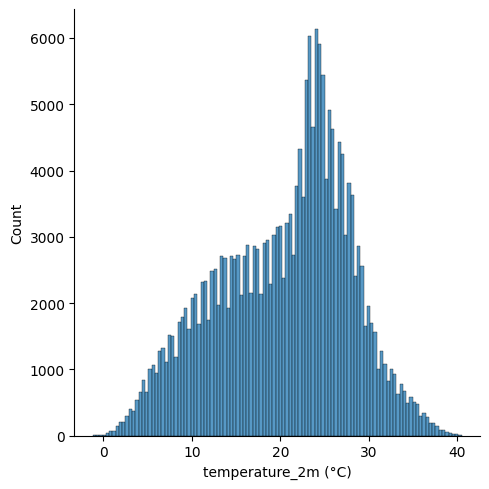

<Figure size 1500x1500 with 0 Axes>

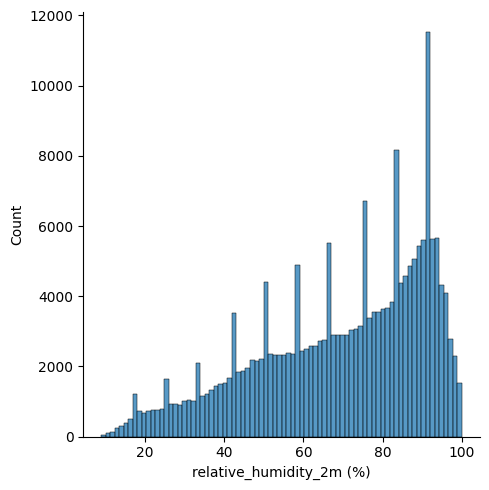

<Figure size 1500x1500 with 0 Axes>

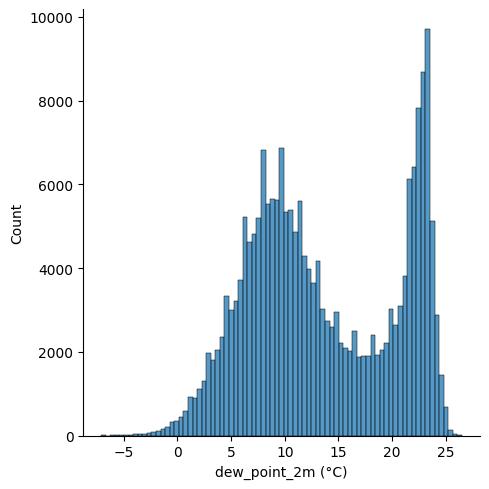

<Figure size 1500x1500 with 0 Axes>

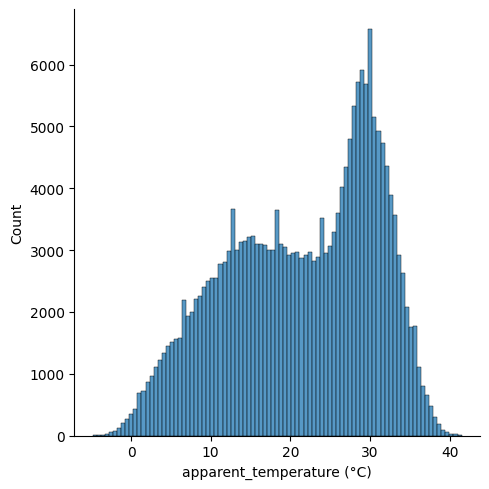

<Figure size 1500x1500 with 0 Axes>

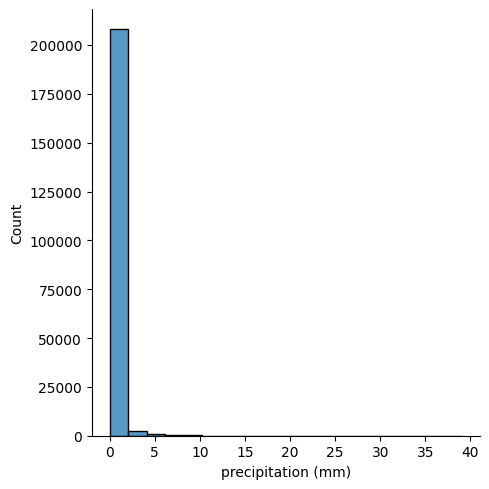

<Figure size 1500x1500 with 0 Axes>

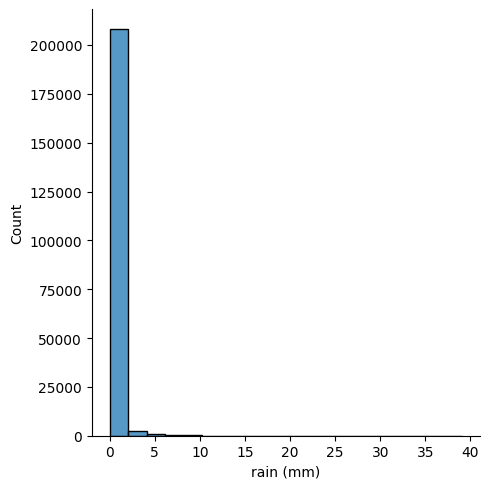

<Figure size 1500x1500 with 0 Axes>

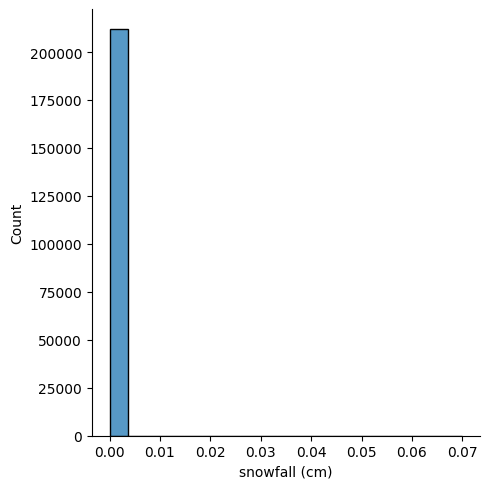

<Figure size 1500x1500 with 0 Axes>

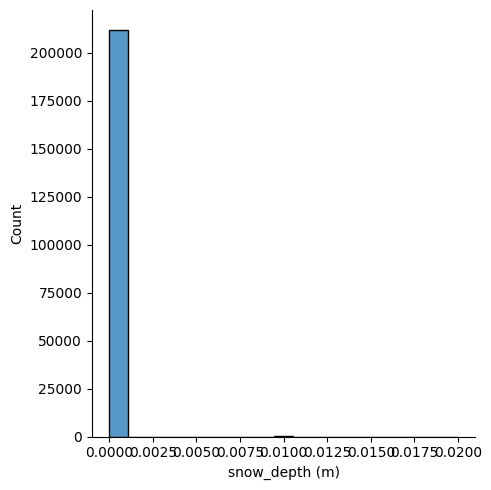

<Figure size 1500x1500 with 0 Axes>

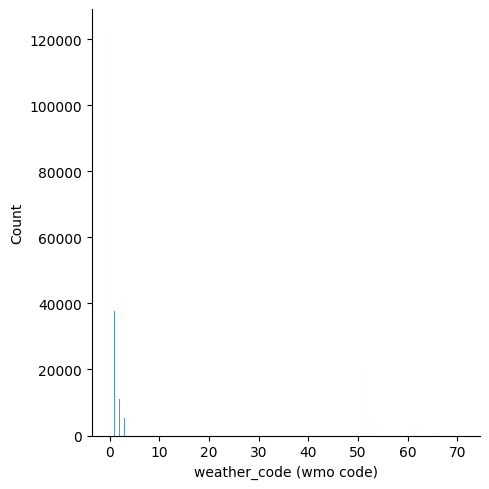

<Figure size 1500x1500 with 0 Axes>

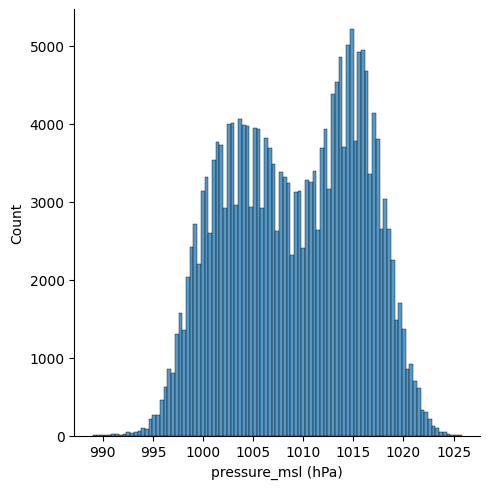

<Figure size 1500x1500 with 0 Axes>

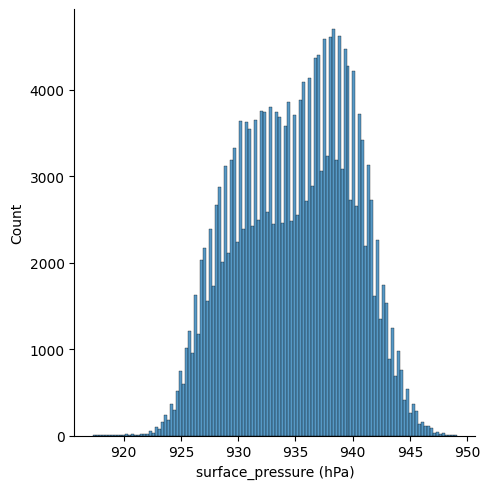

<Figure size 1500x1500 with 0 Axes>

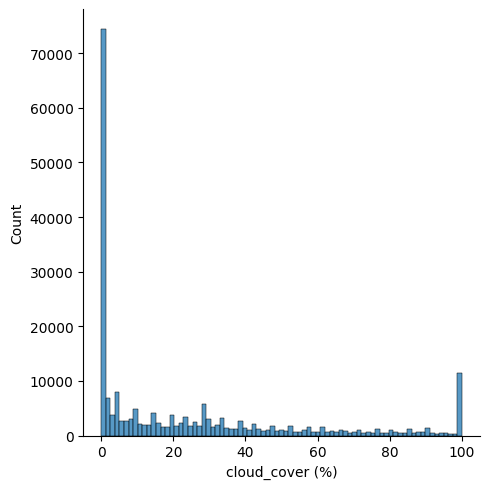

<Figure size 1500x1500 with 0 Axes>

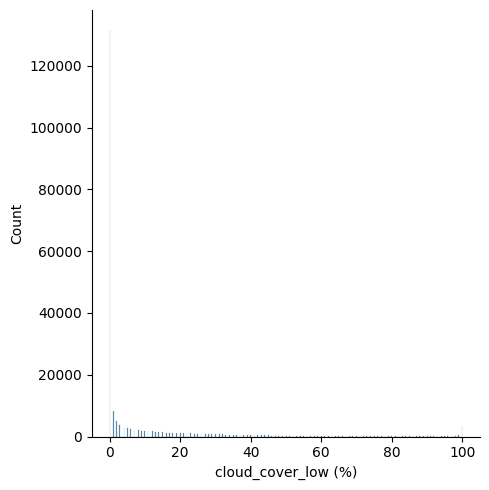

<Figure size 1500x1500 with 0 Axes>

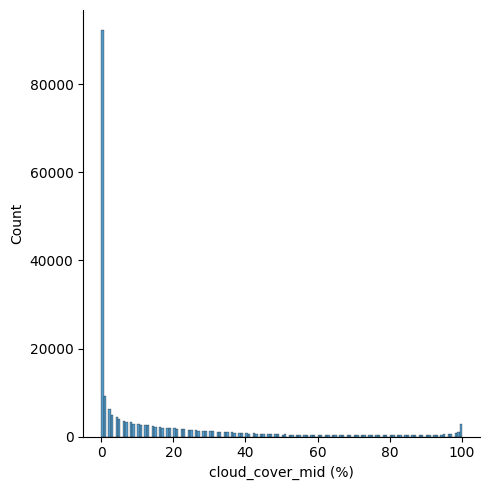

<Figure size 1500x1500 with 0 Axes>

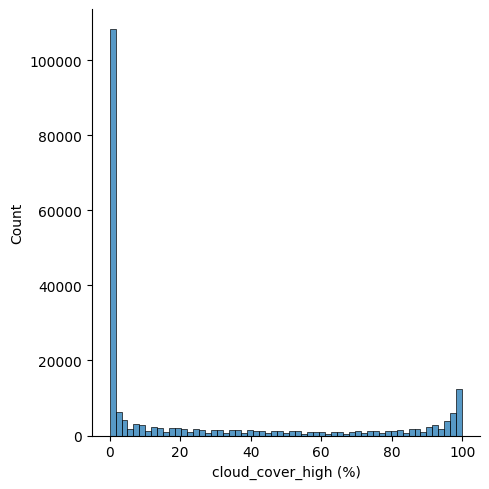

<Figure size 1500x1500 with 0 Axes>

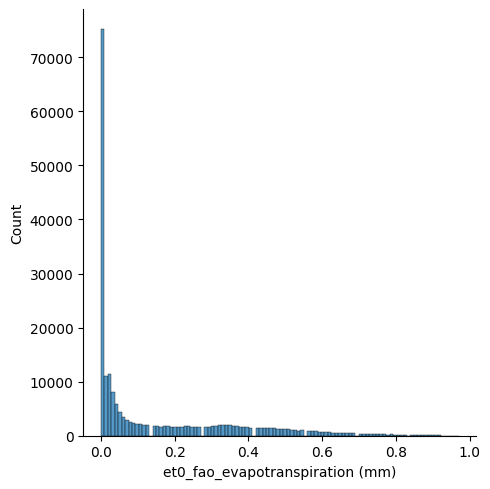

<Figure size 1500x1500 with 0 Axes>

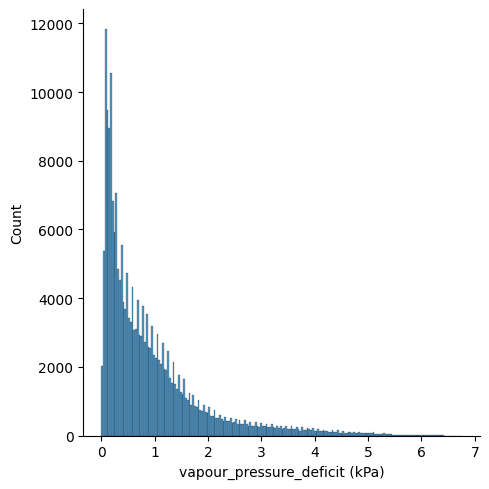

<Figure size 1500x1500 with 0 Axes>

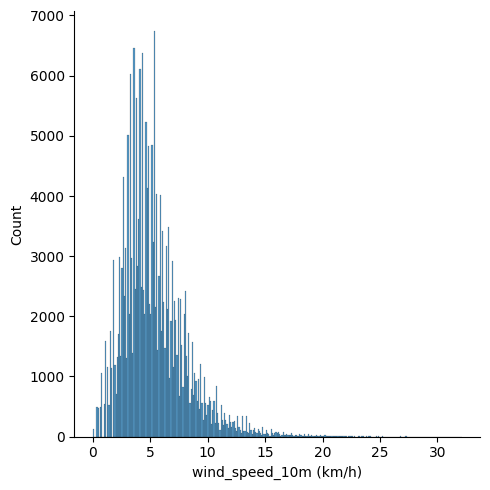

<Figure size 1500x1500 with 0 Axes>

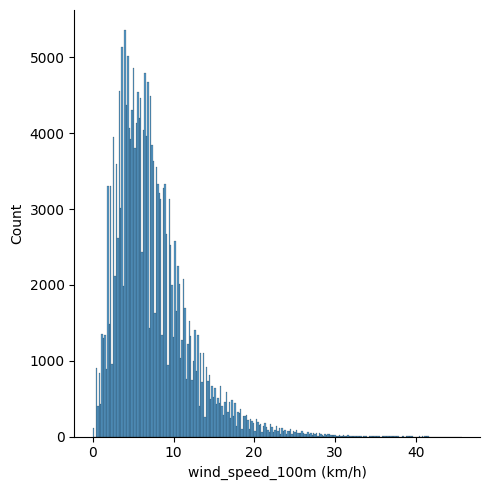

<Figure size 1500x1500 with 0 Axes>

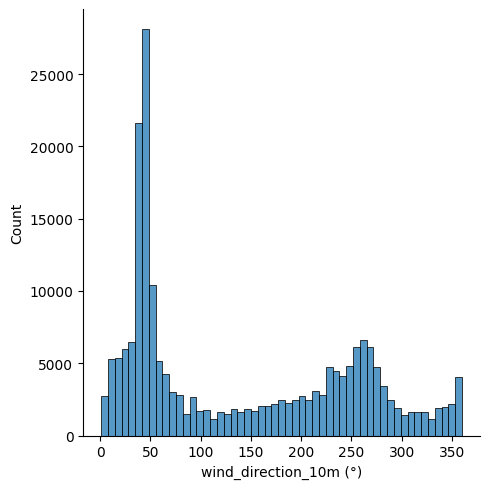

<Figure size 1500x1500 with 0 Axes>

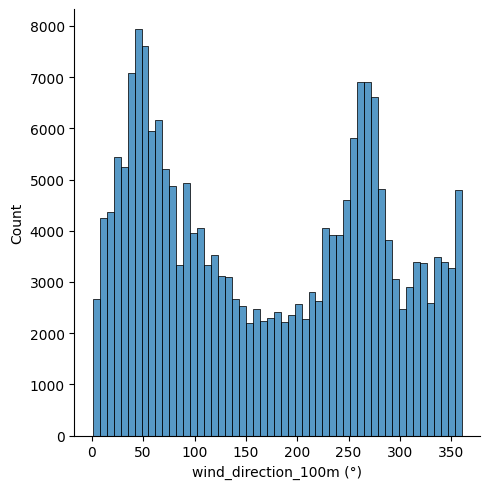

<Figure size 1500x1500 with 0 Axes>

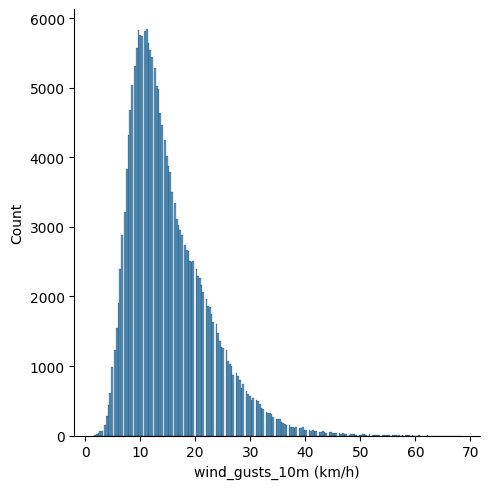

<Figure size 1500x1500 with 0 Axes>

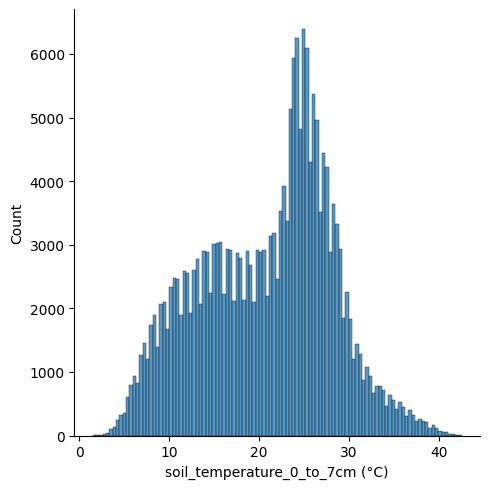

<Figure size 1500x1500 with 0 Axes>

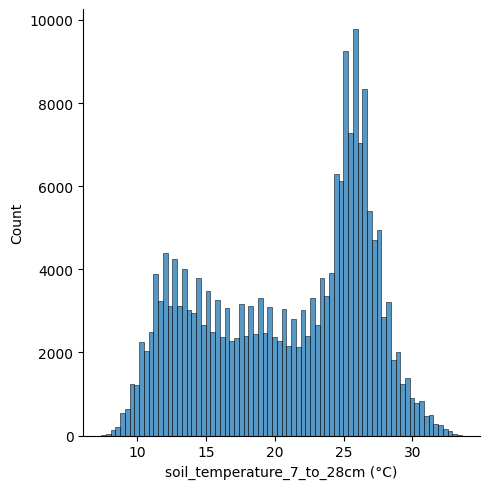

<Figure size 1500x1500 with 0 Axes>

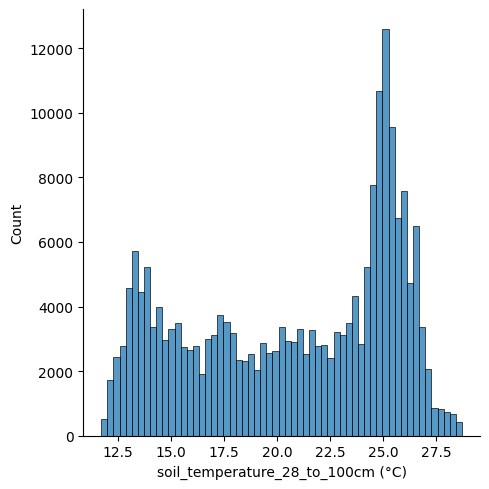

<Figure size 1500x1500 with 0 Axes>

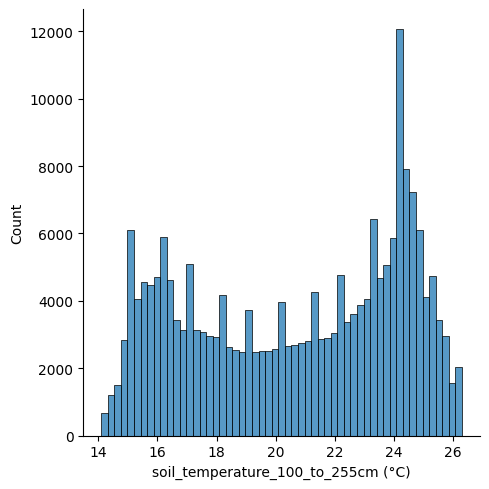

<Figure size 1500x1500 with 0 Axes>

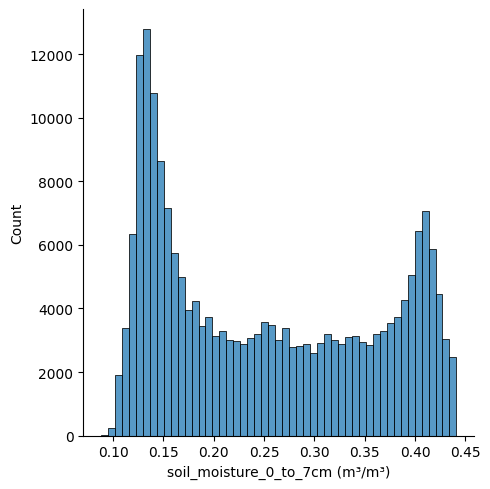

<Figure size 1500x1500 with 0 Axes>

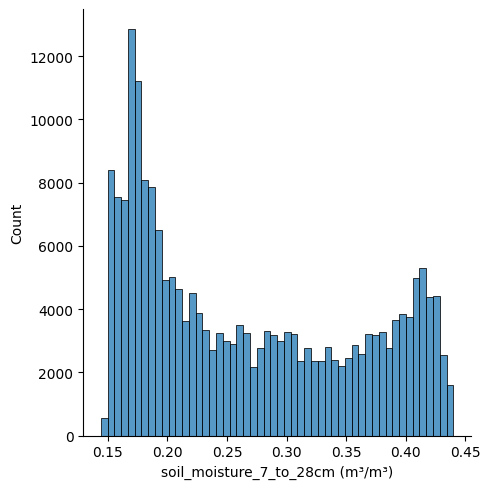

<Figure size 1500x1500 with 0 Axes>

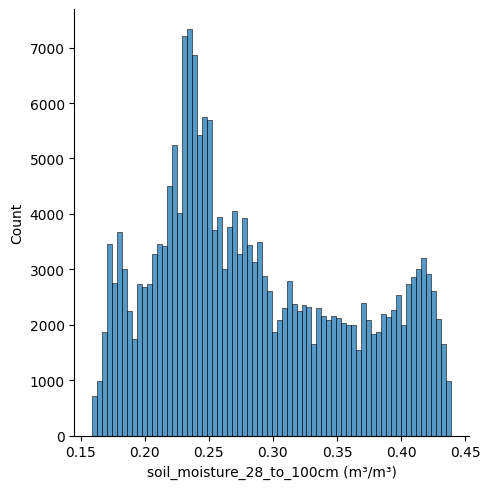

<Figure size 1500x1500 with 0 Axes>

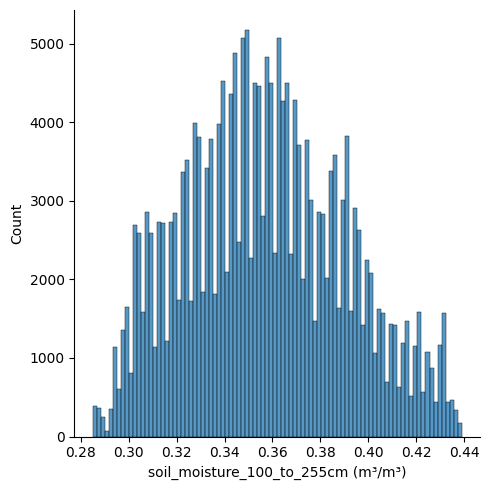

<Figure size 1500x1500 with 0 Axes>

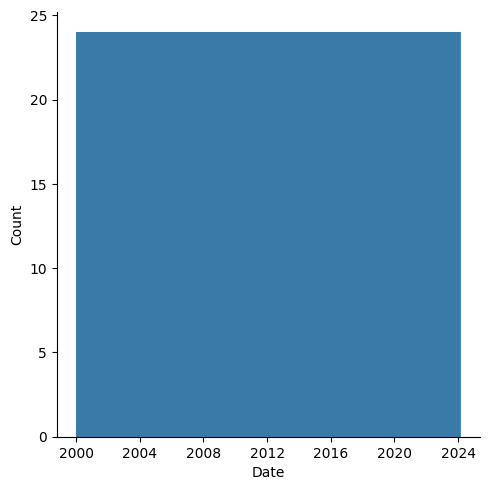

<Figure size 1500x1500 with 0 Axes>

In [17]:
for feature in wdata:
    sns.displot(dataframe[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.figure(figsize = (15 , 15 ))
    plt.show()

In [7]:
wdata.isnull().sum()

temperature_2m (°C)                   0
relative_humidity_2m (%)              0
dew_point_2m (°C)                     0
apparent_temperature (°C)             0
precipitation (mm)                    0
rain (mm)                             0
snowfall (cm)                         0
snow_depth (m)                        0
weather_code (wmo code)               0
pressure_msl (hPa)                    0
surface_pressure (hPa)                0
cloud_cover (%)                       0
cloud_cover_low (%)                   0
cloud_cover_mid (%)                   0
cloud_cover_high (%)                  0
et0_fao_evapotranspiration (mm)       0
vapour_pressure_deficit (kPa)         0
wind_speed_10m (km/h)                 0
wind_speed_100m (km/h)                0
wind_direction_10m (°)                0
wind_direction_100m (°)               0
wind_gusts_10m (km/h)                 0
soil_temperature_0_to_7cm (°C)        0
soil_temperature_7_to_28cm (°C)       0
soil_temperature_28_to_100cm (°C)     0


In [22]:
wdata['Date'] = pd.to_datetime(wdata['Date'], format="%d-%m-%Y")
wdata['Tomorrow Rain'] = wdata['rain (mm)'].shift(-1)
wdata = wdata.ffill()
wdata

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),Date,Tomorrow Rain
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,10.450000,79.208333,6.637500,9.000000,0.0000,0.0000,0.0,0.0,0.000000,1018.208333,...,11.191667,11.887500,14.245833,18.400000,0.141292,0.182375,0.246333,0.368417,2000-01-01,0.0000
2000-01-02,11.100000,80.666667,7.554167,9.833333,0.0000,0.0000,0.0,0.0,0.000000,1017.800000,...,11.758333,12.170833,14.200000,18.304167,0.140333,0.182083,0.246000,0.368000,2000-01-02,0.0000
2000-01-03,11.279167,79.958333,7.608333,10.029167,0.0000,0.0000,0.0,0.0,0.000000,1015.679167,...,12.025000,12.504167,14.200000,18.229167,0.139542,0.181583,0.245375,0.368000,2000-01-03,0.0000
2000-01-04,11.262500,80.083333,7.650000,10.095833,0.0000,0.0000,0.0,0.0,0.000000,1016.341667,...,11.879167,12.495833,14.200000,18.154167,0.139292,0.181250,0.245000,0.367042,2000-01-04,0.0000
2000-01-05,10.591667,82.708333,7.533333,9.312500,0.0000,0.0000,0.0,0.0,0.125000,1016.800000,...,11.595833,12.375000,14.200000,18.083333,0.139000,0.181000,0.245000,0.367000,2000-01-05,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,14.633333,49.791667,3.470833,12.637500,0.0000,0.0000,0.0,0.0,1.791667,1017.804167,...,13.875000,13.179167,13.500000,14.400000,0.247000,0.273250,0.252542,0.384750,2024-02-26,0.0750
2024-02-27,12.187500,73.041667,7.204167,10.866667,0.0750,0.0750,0.0,0.0,17.791667,1017.941667,...,12.658333,13.395833,13.500000,14.400000,0.252875,0.270875,0.253458,0.384000,2024-02-27,0.0000
2024-02-28,14.504167,60.666667,6.662500,12.991667,0.0000,0.0000,0.0,0.0,0.000000,1014.708333,...,13.754167,13.504167,13.525000,14.400000,0.246750,0.265208,0.250083,0.383500,2024-02-28,0.0000


In [23]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8827 entries, 2000-01-01 to 2024-03-01
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   temperature_2m (°C)                 8827 non-null   float64       
 1   relative_humidity_2m (%)            8827 non-null   float64       
 2   dew_point_2m (°C)                   8827 non-null   float64       
 3   apparent_temperature (°C)           8827 non-null   float64       
 4   precipitation (mm)                  8827 non-null   float64       
 5   rain (mm)                           8827 non-null   float64       
 6   snowfall (cm)                       8827 non-null   float64       
 7   snow_depth (m)                      8827 non-null   float64       
 8   weather_code (wmo code)             8827 non-null   float64       
 9   pressure_msl (hPa)                  8827 non-null   float64       
 10  surface_pressu

In [24]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8827 entries, 2000-01-01 to 2024-03-01
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   temperature_2m (°C)                 8827 non-null   float64       
 1   relative_humidity_2m (%)            8827 non-null   float64       
 2   dew_point_2m (°C)                   8827 non-null   float64       
 3   apparent_temperature (°C)           8827 non-null   float64       
 4   precipitation (mm)                  8827 non-null   float64       
 5   rain (mm)                           8827 non-null   float64       
 6   snowfall (cm)                       8827 non-null   float64       
 7   snow_depth (m)                      8827 non-null   float64       
 8   weather_code (wmo code)             8827 non-null   float64       
 9   pressure_msl (hPa)                  8827 non-null   float64       
 10  surface_pressu

# Correlation

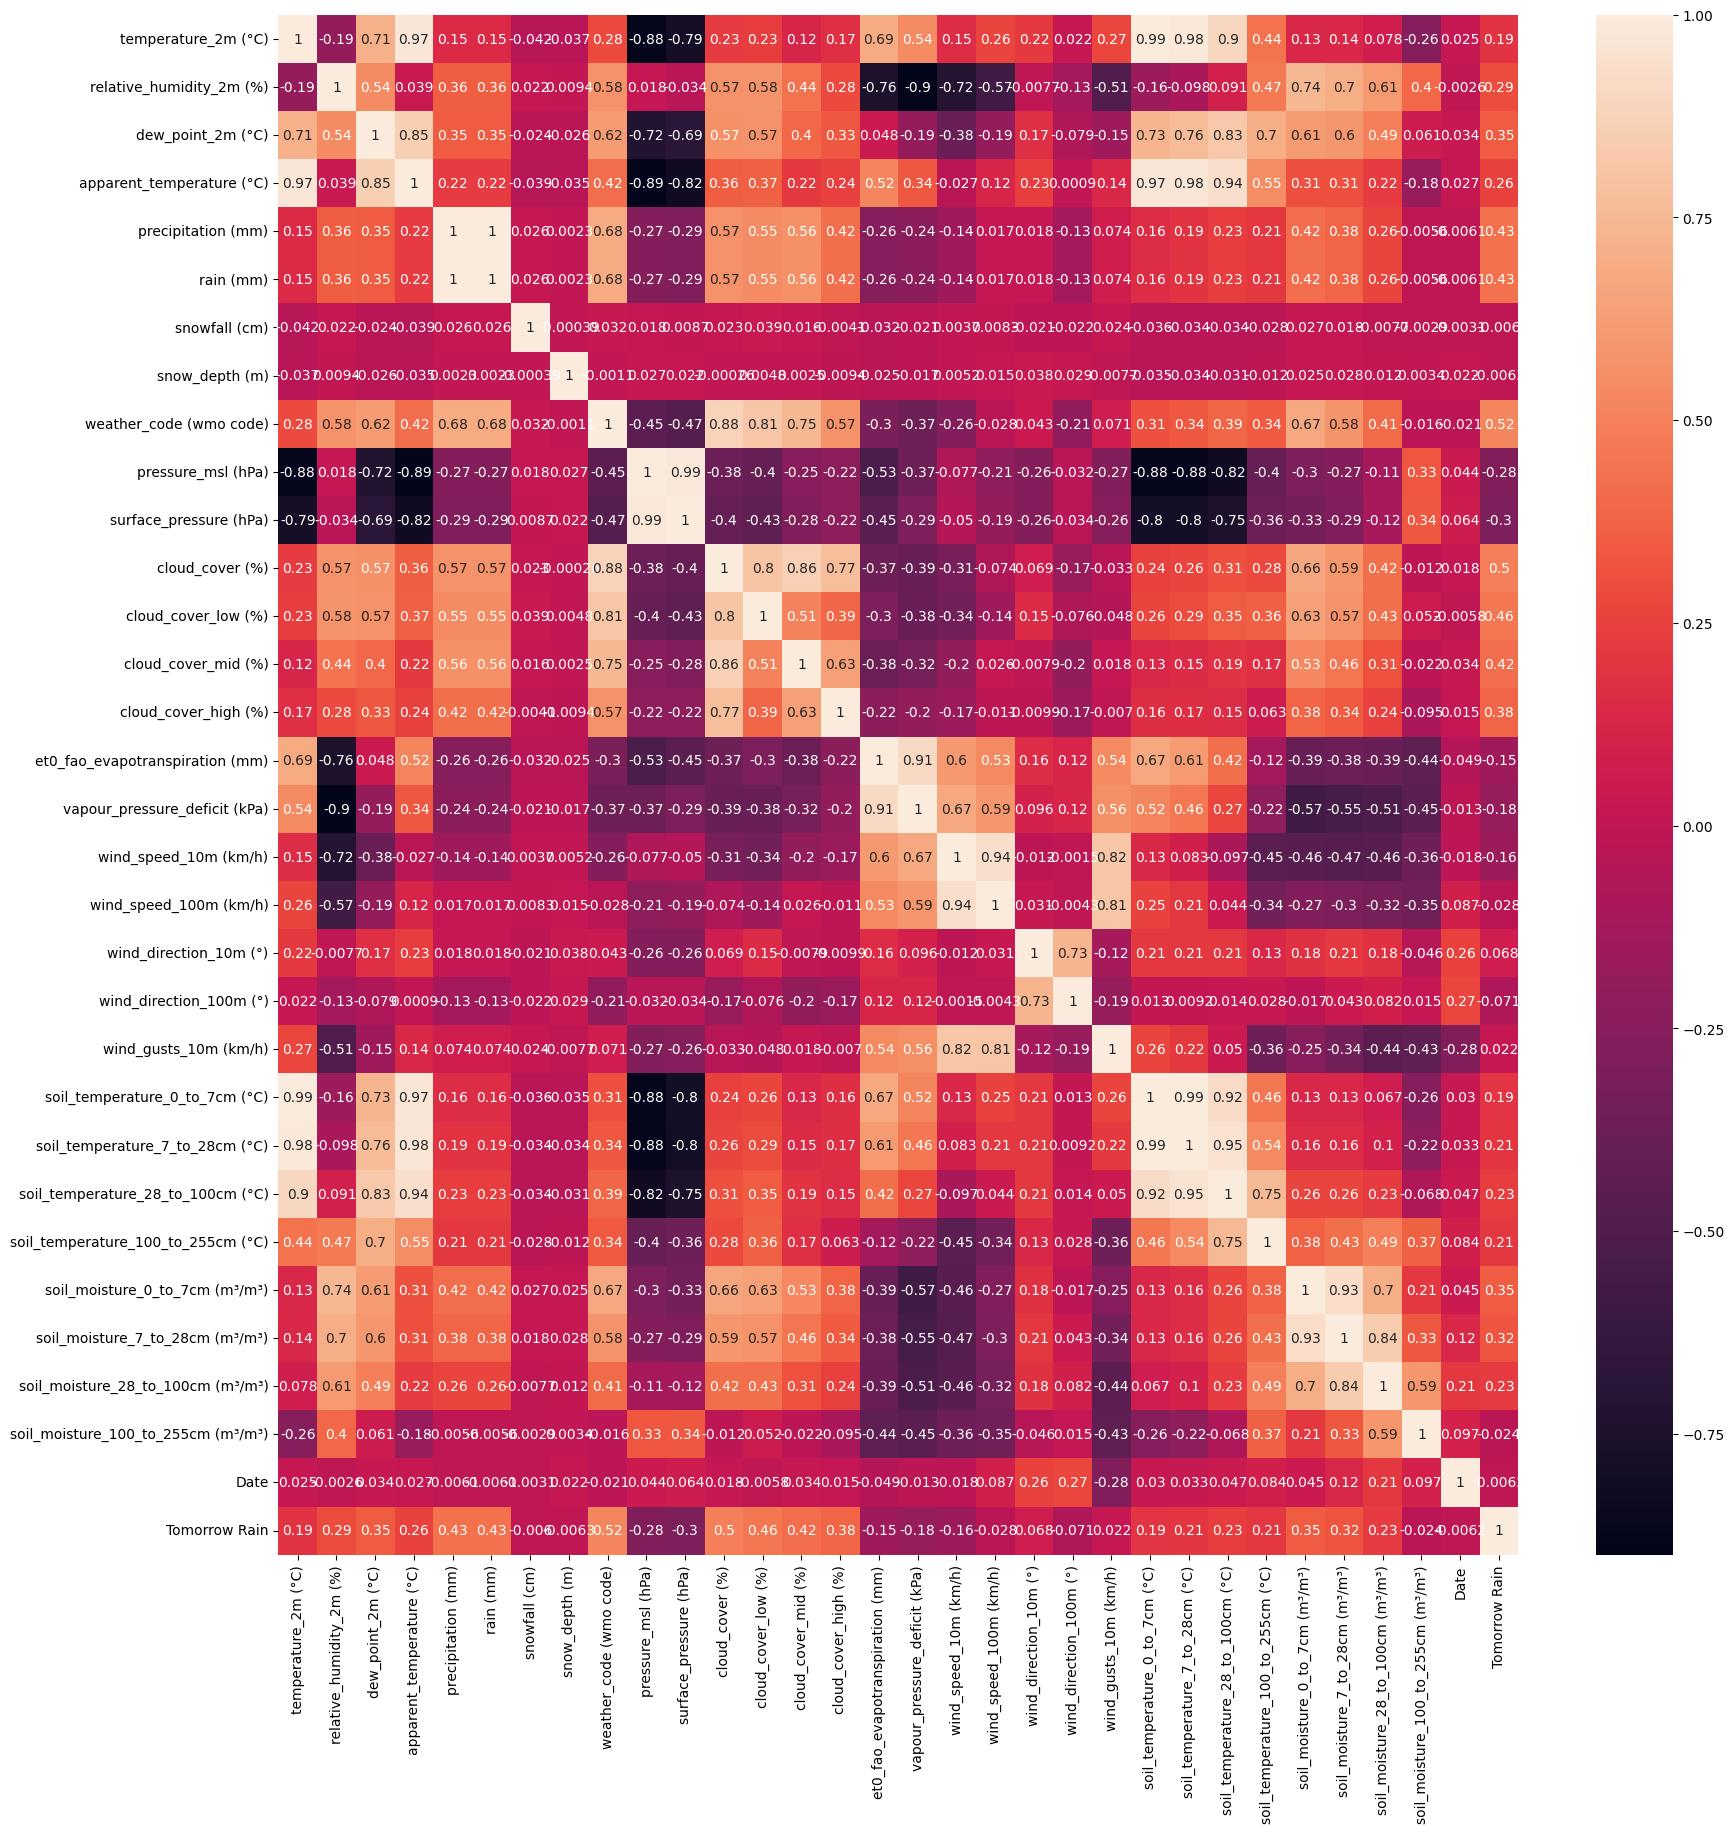

In [25]:
correlation = wdata.corr()
plt.figure(figsize = (20 , 20 ))
# plotting heatmap 
g = sns.heatmap(correlation , annot = True)

In [27]:
correlation_matrix = wdata.corr()
rain_correlation = correlation_matrix['Tomorrow Rain'].sort_values(ascending=False)
rain_correlation

Tomorrow Rain                         1.000000
weather_code (wmo code)               0.521490
cloud_cover (%)                       0.495509
cloud_cover_low (%)                   0.464388
rain (mm)                             0.434900
precipitation (mm)                    0.434892
cloud_cover_mid (%)                   0.418870
cloud_cover_high (%)                  0.379637
dew_point_2m (°C)                     0.350864
soil_moisture_0_to_7cm (m³/m³)        0.348355
soil_moisture_7_to_28cm (m³/m³)       0.320595
relative_humidity_2m (%)              0.293498
apparent_temperature (°C)             0.257580
soil_temperature_28_to_100cm (°C)     0.232944
soil_moisture_28_to_100cm (m³/m³)     0.226986
soil_temperature_100_to_255cm (°C)    0.206840
soil_temperature_7_to_28cm (°C)       0.206286
soil_temperature_0_to_7cm (°C)        0.192314
temperature_2m (°C)                   0.185362
wind_direction_10m (°)                0.067552
wind_gusts_10m (km/h)                 0.021518
snowfall (cm)

# Splitting Data


In [11]:
# These will be converted into a CSV file
train = wdata[:7000]
test = wdata[7000:]

In [12]:
train.to_excel('ptrain.xlsx', index=False)

In [13]:
test.to_excel('ptest.xlsx', index=False)